In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile

In [ ]:
local_zip = '/content/drive/MyDrive/face_recognition.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/face_recognition'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
train_purvika_dir = os.path.join(train_dir, 'Purvika Bajaj')
train_shivani_dir = os.path.join(train_dir, 'Shivani Shedge')
train_renesa_dir = os.path.join(train_dir, 'Renesa Ray')
train_dere_dir = os.path.join(train_dir, 'Shivani Dere')
train_maziya_dir = os.path.join(train_dir, 'Maziya Fatima')
train_shubhankar_dir = os.path.join(train_dir, 'Shubankar Pawar')
train_rahul_dir = os.path.join(train_dir, 'Rahul Barman')
train_sayali_dir = os.path.join(train_dir, 'Sayali Badade')
train_swati_dir = os.path.join(train_dir, 'Swati Raj')
train_sagarika_dir = os.path.join(train_dir, 'Sagarika Verma')
train_divya_dir = os.path.join(train_dir, 'Divya Saxena')
train_abhishek_dir = os.path.join(train_dir, 'Abhishek Saxena')
train_swati_dir = os.path.join(train_dir, 'Swati Raj')
train_shraddha_dir = os.path.join(train_dir, 'Shraddha Chobhe')
train_benoi_dir = os.path.join(train_dir, 'Benoi Alex')
train_unzela_dir = os.path.join(train_dir, 'Unzela Inamdar')


test_purvika_dir = os.path.join(test_dir, 'Purvika Bajaj')
test_shivani_dir = os.path.join(test_dir, 'Shivani Shedge')
test_renesa_dir = os.path.join(test_dir, 'Renesa Ray')
test_dere_dir = os.path.join(test_dir, 'Shivani Dere')
test_maziya_dir = os.path.join(test_dir, 'Maziya Fatima')
test_shubhankar_dir = os.path.join(test_dir, 'Shubankar Pawar')
test_rahul_dir = os.path.join(test_dir, 'Rahul Barman')
test_sayali_dir = os.path.join(test_dir, 'Sayali Badade')
test_swati_dir = os.path.join(test_dir, 'Swati Raj')
test_sagarika_dir = os.path.join(test_dir, 'Sagarika Verma')
test_divya_dir = os.path.join(test_dir, 'Divya Saxena')
test_abhishek_dir = os.path.join(test_dir, 'Abhishek Saxena')
test_swati_dir = os.path.join(test_dir, 'Swati Raj')
test_shraddha_dir = os.path.join(test_dir, 'Shraddha Chobhe')
test_benoi_dir = os.path.join(test_dir, 'Benoi Alex')
test_unzela_dir = os.path.join(test_dir, 'Unzela Inamdar')

In [ ]:
train_purvika_names = os.listdir(train_purvika_dir)
print(train_purvika_names[:5])

test_purvika_names = os.listdir(test_purvika_dir)
print(test_purvika_names[:5])

['purvika (13).jpg', 'purvika (16).jpg', 'purvika (5).jpg', 'purvika (10).jpg', 'purvika (9).jpg']
['purvika (5).jpg', 'purvika (1).jpg', 'purvika (3).jpg', 'purvika (2).jpg', 'purvika (4).jpg']


In [ ]:
print('TRAINING DATA')
train_purvika_img = print('No.of images of Purvika Bajaj:', len(os.listdir(train_purvika_dir)))
train_shivani_img = print('No.of images of Shivani Shedge:', len(os.listdir(train_shivani_dir)))
print('\nTESTING DATA')
test_purvika_img = print('No.of images of Purvika Bajaj:', len(os.listdir(test_purvika_dir)))
test_shivani_img = print('No.of images of Shivani Shedge:', len(os.listdir(test_shivani_dir)))

TRAINING DATA
No.of images of Purvika Bajaj: 20
No.of images of Shivani Shedge: 20

TESTING DATA
No.of images of Purvika Bajaj: 5
No.of images of Shivani Shedge: 5


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100,100),
    batch_size = 10,
    class_mode = 'categorical' 
)

Found 300 images belonging to 15 classes.


In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

(100, 100, 3)


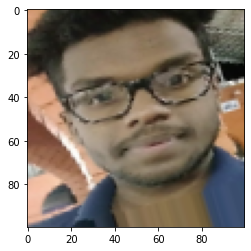

In [ ]:
x,y = train_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (100,100),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 75 images belonging to 15 classes.


(100, 100, 3)


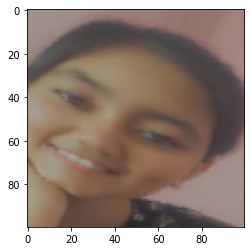

In [ ]:
x,y = test_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
model = VGG16(weights = 'imagenet', include_top = False)

x = model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(15, activation='softmax')(x)

model_vgg = Model(model.input, x)

for layer in model.layers:
  layer.trainable = False

In [ ]:
model_vgg.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
import tensorflow as tf

In [ ]:
batch_size=10
history = model_vgg.fit_generator(
    train_generator,
    epochs = 30,
    validation_data = test_generator,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
30/30 [==============================] - 6s 193ms/step - loss: 2.7511 - accuracy: 0.1033 - val_loss: 2.4829 - val_accuracy: 0.2533
Epoch 2/30
30/30 [==============================] - 5s 179ms/step - loss: 2.3228 - accuracy: 0.2900 - val_loss: 2.3048 - val_accuracy: 0.2533
Epoch 3/30
30/30 [==============================] - 5s 176ms/step - loss: 2.0924 - accuracy: 0.3533 - val_loss: 2.0780 - val_accuracy: 0.3333
Epoch 4/30
30/30 [==============================] - 5s 175ms/step - loss: 1.8408 - accuracy: 0.4367 - val_loss: 1.9479 - val_accuracy: 0.3600
Epoch 5/30
30/30 [==============================] - 5s 180ms/step - loss: 1.6887 - accuracy: 0.5133 - val_loss: 1.9693 - val_accuracy: 0.3333
Epoch 6/30
30/30 [==============================] - 5s 177ms/step - loss: 1.5854 - accuracy: 0.5000 - val_loss: 1.7758 - val_accuracy: 0.4667
Epoch 7/30
30/30 [==============================] - 5s 182ms/step - loss

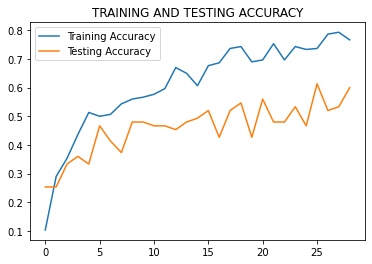

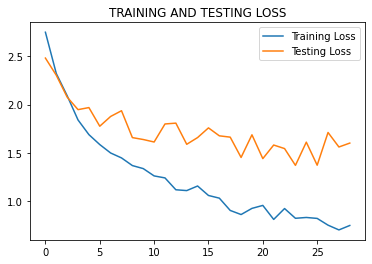

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Testing Accuracy')
plt.title('TRAINING AND TESTING ACCURACY')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs,val_loss, label='Testing Loss')
plt.title('TRAINING AND TESTING LOSS')
plt.legend()

In [ ]:
model_vgg.save('face.h5')

In [ ]:
!pip install streamlit

     |████████████████████████████████| 143kB 7.2MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!pip install pyngrok

In [ ]:
%%writefile predict.py

import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding',False) #ignores the streamlit warning
@st.cache(allow_output_mutation=True) #the model is loaded only once and stored in cache memory

def load_model():
  model = tf.keras.models.load_model('/content/face.h5')
  return model

model = load_model()

st.write("""
    FACE RECOGNITION SYSTEM
    """
) #title of webpage

file = st.file_uploader('Please upload an image', type=['jpg','png','jpeg']) #file_uploader uploads the image

import cv2
import PIL
from PIL import Image, ImageOps
import numpy as np

#accepts an image, fetches the model and gives out prediction
def import_and_predict(image_data, model):
  size = (100,100)
  image = ImageOps.fit(image_data, size, Image.ANTIALIAS) #antialias resized the image into that dimension
  img = np.asarray(image)
  img_reshape = img[np.newaxis,...] 
#the image here is 3D (32,32,3) but the model is trained on 4D i.e., not on a single image but multiple images
#to make a prediction we need to give it 4D 
  prediction = model.predict(img_reshape)

  return prediction

if file is None:
  st.text('Please upload an image')
else:
  image = Image.open(file) #opening the image
  st.image(image, use_column_width=True) #displaying the image
  predictions = import_and_predict(image, model) #supplying the image and model
  class_names = ['Purvika Bajaj','Shivani Shedge','Renesa Ray','Shivani Dere','Maziya Fatima','Shubankar Pawar','Rahul Barman','Sayali Badade','Swati Raj','Sagarika Verma','Divya Saxena','Abhishek Saxena','Swati Raj','Shraddha Chobhe','Benoi Alex','Unzela Inamdar']
  string = 'This image most likely is: ' + class_names[np.argmax(predictions)]
  #calculationg the position of max probability and its class is picked up
  st.success(string) #displays the ouput in a box


Overwriting predict.py


In [ ]:
!ngrok authtoken 1gfUTu4cBwBUBvcb1HCPbjdkl4j_4tRvCaHJy5aW8Aj92XE5v #creates yml file which contains authentication id which is used to deploy local app to web server

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port=80) 
url

<NgrokTunnel: "http://7d93e3304cc2.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 predict.py >/dev/null #stores the output to a different file

/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2020-11-29 08:55:22.861551: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-29 08:55:23.940401: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-29 08:55:23.944705: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-29 08:55:23.945189: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-11-29 08:55:23.945227: 

In [ ]:
!cat /content/nohup.out